# In this notebook we visualize effects of inserting promoters

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/promoter_scores/*/*.h5" # 
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.format_io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)
dfs

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_seqs,ctcf_flank_bp,ctcf_genomic_score,ctcf_locus_specification,...,gene_flank_bp,gene_id,gene_locus_specification,gene_strand,insert_flank_bp,insert_loci,insert_strand,locus_orientation,out_folder,spacer_bp
0,32.78125,20.375000,46.56250,49.06250,41.00000,40.50000,2,55,4.121094,"chr3,128348373,128348392",...,0,ENSMUSG00000039496.8,"chr2,3503029,3513029",+,55$0,"chr3,128348373,128348392$chr2,3503029,3513029",-$+,<>,data,10
1,38.25000,27.078125,46.12500,47.12500,42.12500,40.43750,2,55,4.121094,"chr3,128348373,128348392",...,0,ENSMUSG00000039496.8,"chr2,3503029,3513029",+,55$0,"chr3,128348373,128348392$chr2,3503029,3513029",-$+,><,data,10
2,31.84375,19.593750,47.34375,49.96875,41.59375,41.00000,2,55,4.121094,"chr3,128348373,128348392",...,0,ENSMUSG00000039496.8,"chr2,3503029,3513029",+,55$0,"chr3,128348373,128348392$chr2,3503029,3513029",-$+,>>,data,20
3,35.15625,23.531250,45.96875,47.81250,41.18750,40.37500,2,55,4.121094,"chr3,128348373,128348392",...,0,ENSMUSG00000039496.8,"chr2,3503029,3513029",+,55$0,"chr3,128348373,128348392$chr2,3503029,3513029",-$+,<<,data,20
4,32.71875,19.921875,46.93750,49.65625,41.15625,40.71875,2,55,4.121094,"chr3,128348373,128348392",...,0,ENSMUSG00000039496.8,"chr2,3503029,3513029",+,55$0,"chr3,128348373,128348392$chr2,3503029,3513029",-$+,<>,data,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,38.40625,32.031250,46.00000,47.37500,43.34375,41.50000,2,35,15.789062,"chr4,109438094,109438113",...,0,ENSMUSG00000081278.1,"chr2,3521284,3531284",+,35$0,"chr4,109438094,109438113$chr2,3521284,3531284",+$+,><,data,30
2670,40.71875,36.843750,46.37500,46.96875,44.93750,42.25000,2,35,15.789062,"chr4,109438094,109438113",...,100,ENSMUSG00000081278.1,"chr2,3521284,3531284",+,35$100,"chr4,109438094,109438113$chr2,3521284,3531284",+$+,>>,data,0
2671,37.81250,31.156250,47.37500,48.78125,44.50000,42.31250,2,35,15.789062,"chr4,109438094,109438113",...,100,ENSMUSG00000081278.1,"chr2,3521284,3531284",+,35$100,"chr4,109438094,109438113$chr2,3521284,3531284",+$+,<<,data,0
2672,40.56250,36.375000,47.93750,48.59375,46.31250,43.25000,2,35,15.789062,"chr4,109438094,109438113",...,100,ENSMUSG00000081278.1,"chr2,3521284,3531284",+,35$100,"chr4,109438094,109438113$chr2,3521284,3531284",+$+,<>,data,0


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6

# General scores distribution

Text(0.5, 1.0, 'General distributions of SCD scores *n=18720*')

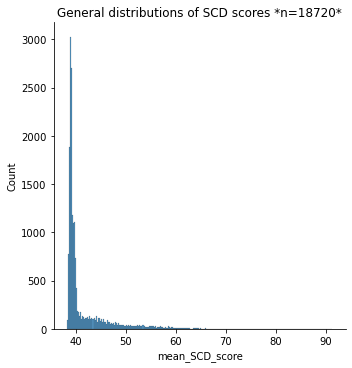

In [4]:
dfs.reset_index(drop=True, inplace=True)
# dfs = dfs.loc[dfs["ctcf_genomic_score"]>=15] # filtering out weak ctcf (need a way to find better weaker ctcf, these aint working)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")

# Effect of different background seqs 

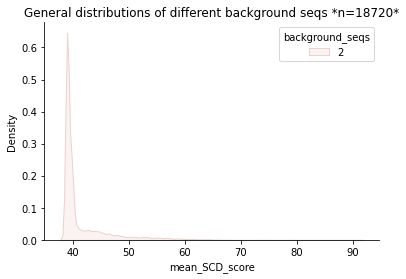

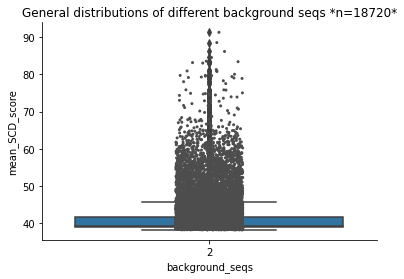

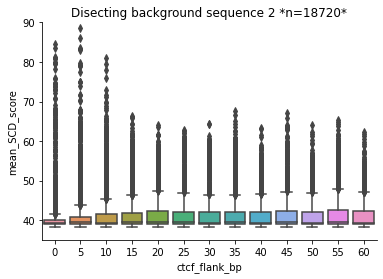

In [5]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="background_seqs", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='background_seqs', y="mean_SCD_score")
sns.stripplot(x="background_seqs", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

for score in [2]:
    df_dummy_parameter = dfs.loc[dfs["background_seqs"]==score]
    sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score")
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting background sequence {score} *n={df_dummy_parameter.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.ylim([35, 90])
    plt.show()
    plt.close()

# Effect of locus orientation

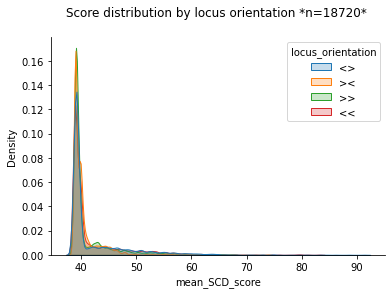

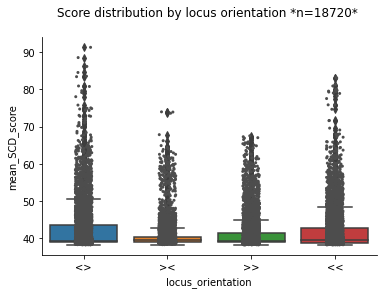

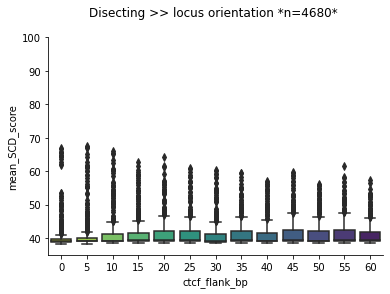

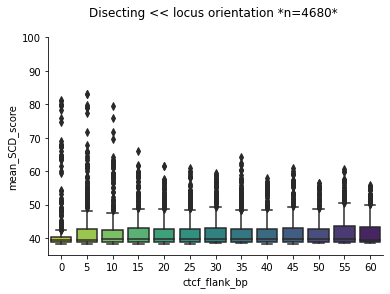

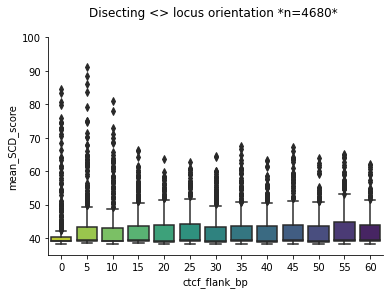

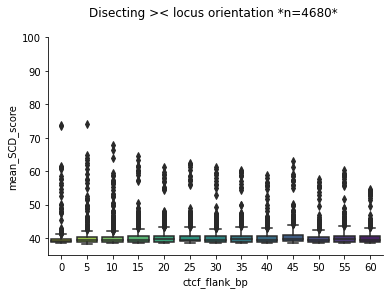

In [6]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="locus_orientation", bw_adjust=.3, fill=True)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='locus_orientation', y="mean_SCD_score")
sns.stripplot(x="locus_orientation", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [">>","<<","<>","><"]: #
    df_dummy_parameter = dfs.loc[dfs["locus_orientation"]==score]  
    sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", palette='viridis_r')
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} locus orientation *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.ylim([35, 100])
    plt.show()
    plt.close()
    
    
#     I used this to see how genes are affected each orientation and flank
 
    # for flank in [i for i in range(0,61,5)]:
    #     df_dummy_parameter_1 = df_dummy_parameter.loc[dfs["ctcf_flank_bp"]==flank]
    #     sns.boxplot(data=df_dummy_parameter_1, x='gene_id', y="mean_SCD_score")
    #     sns.stripplot(x="gene_id", y="mean_SCD_score", data=df_dummy_parameter_1, size=3, color=".3", linewidth=0)
    #     plt.title(f"Disecting {flank} flanking basepairs following{score} *sample{df_dummy_parameter_1.shape[0]}*")
    #     plt.ylim([35, 100])
    #     plt.show()
    #     plt.close()

# Effect of CTCF flank basepairs

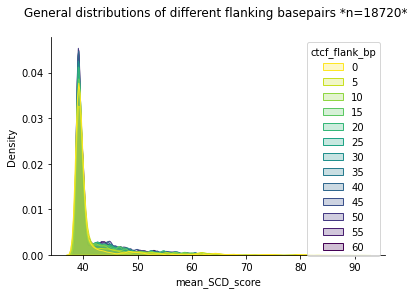

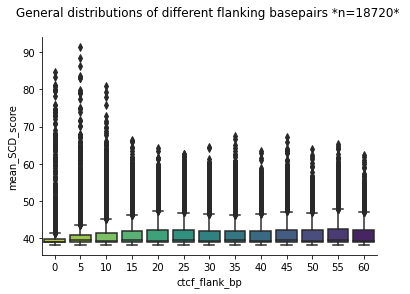

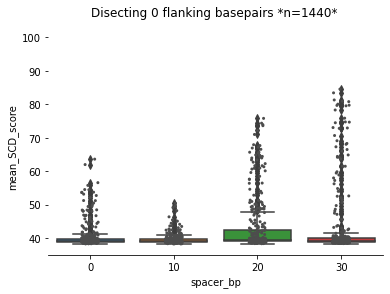

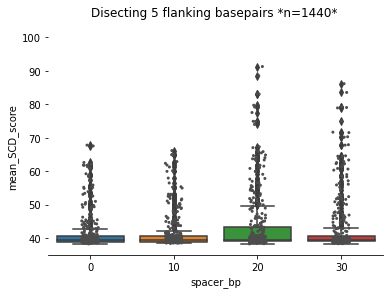

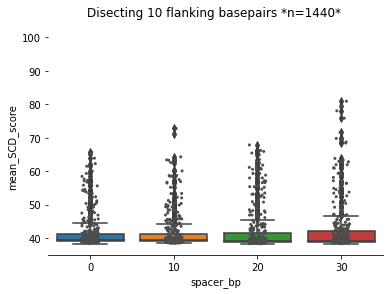

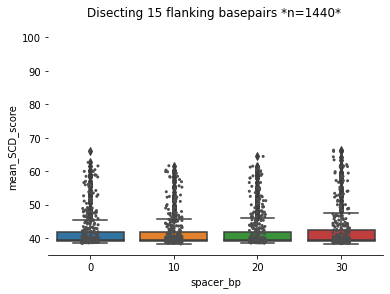

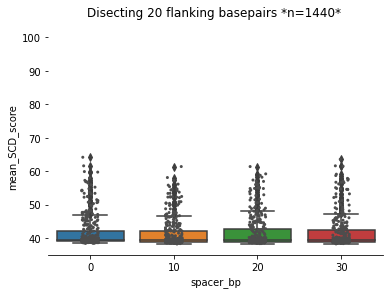

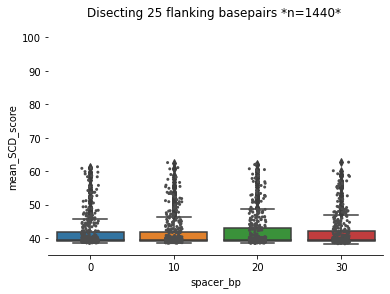

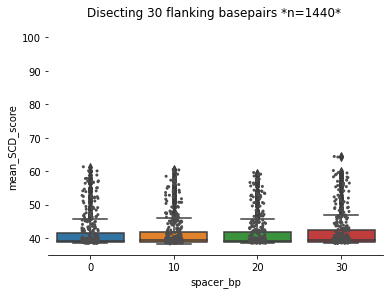

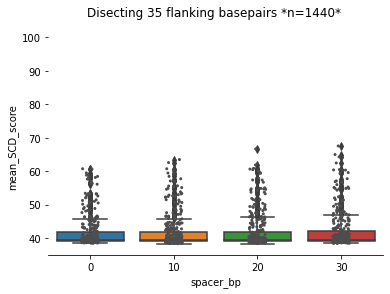

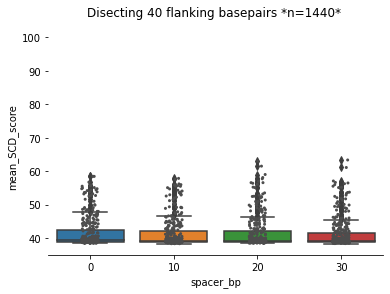

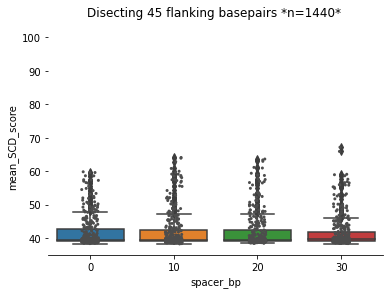

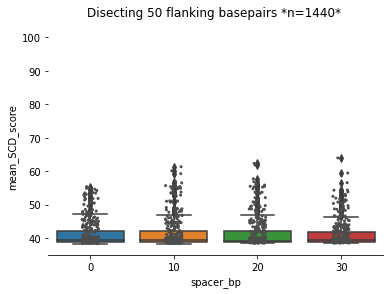

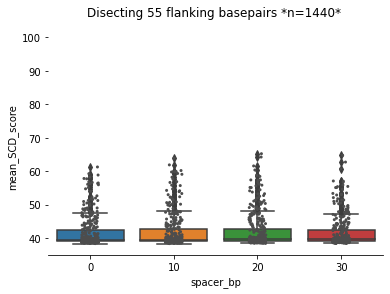

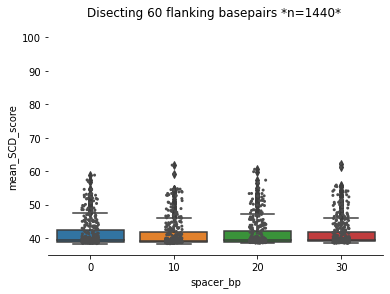

In [7]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_flank_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='ctcf_flank_bp', y="mean_SCD_score", palette='viridis_r')
# sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [i for i in range(0,61,5)]:#[i for i in range(0,501,100)]:# 
    df_dummy_parameter = dfs.loc[dfs["ctcf_flank_bp"]==score]
    # with sns.set_style("whitegrid"):

    sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score")
    sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True, left=True)
    plt.ylim([35, 100])
    plt.show()
    plt.close()

# Effect of spacing basepairs

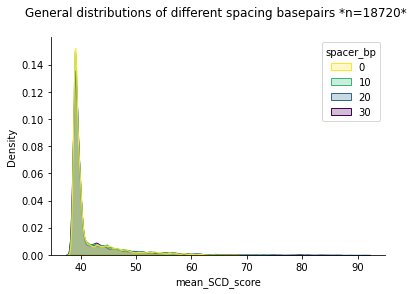

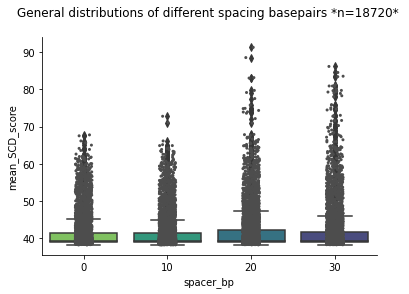

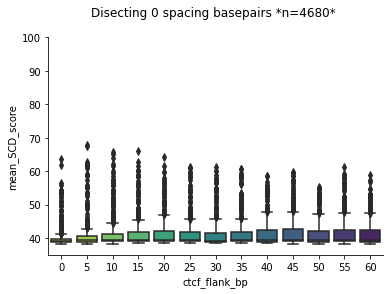

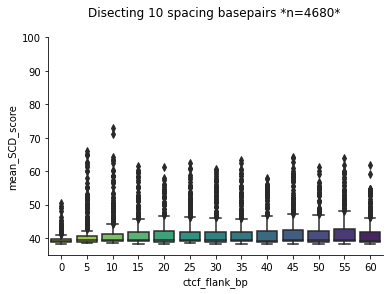

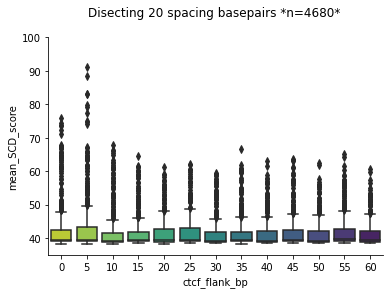

In [8]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="spacer_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='spacer_bp', y="mean_SCD_score", palette='viridis_r')
sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [i for i in range(0,21,10)]: 
    df_dummy_parameter = dfs.loc[dfs["spacer_bp"]==score]
    sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", palette='viridis_r')
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} spacing basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.ylim([35, 100])
    plt.show()
    plt.close()

# Attempt to fish possible influencial genes

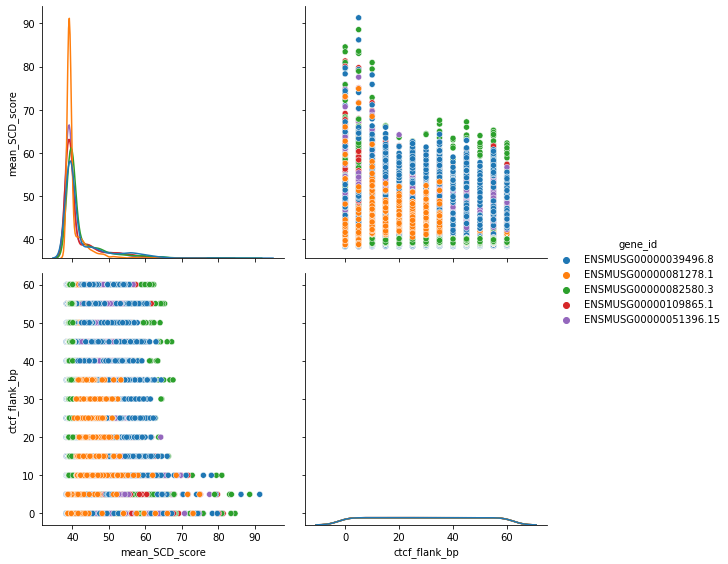

In [9]:
g = sns.PairGrid(dfs, vars=["mean_SCD_score", "ctcf_flank_bp"], hue="gene_id",height=4)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

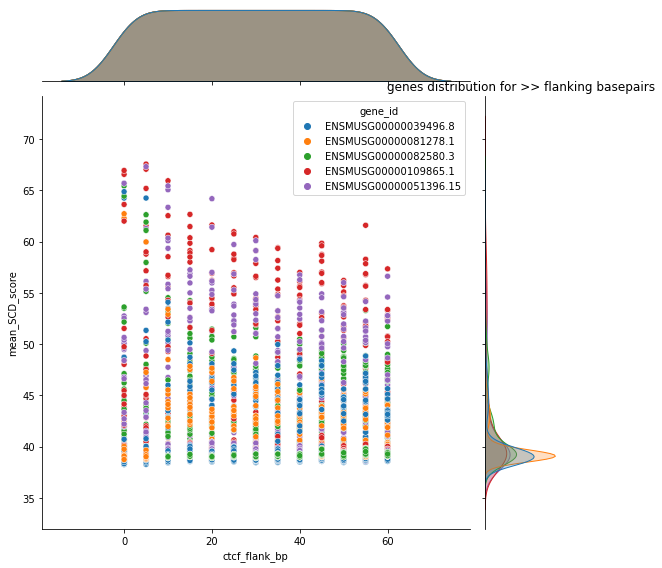

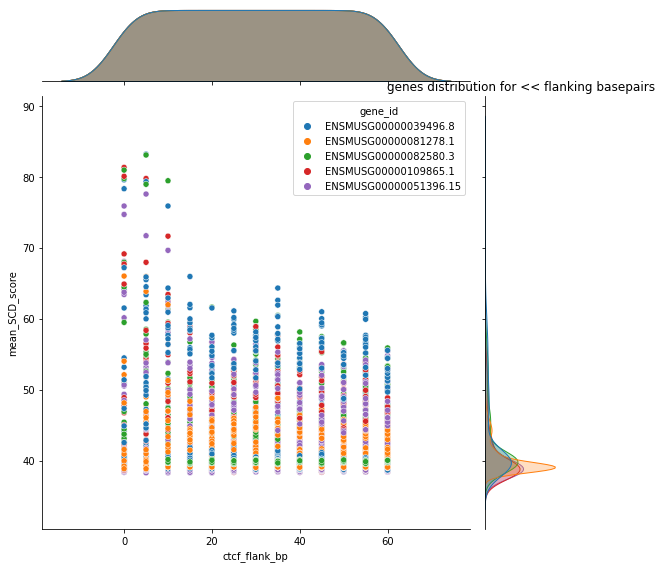

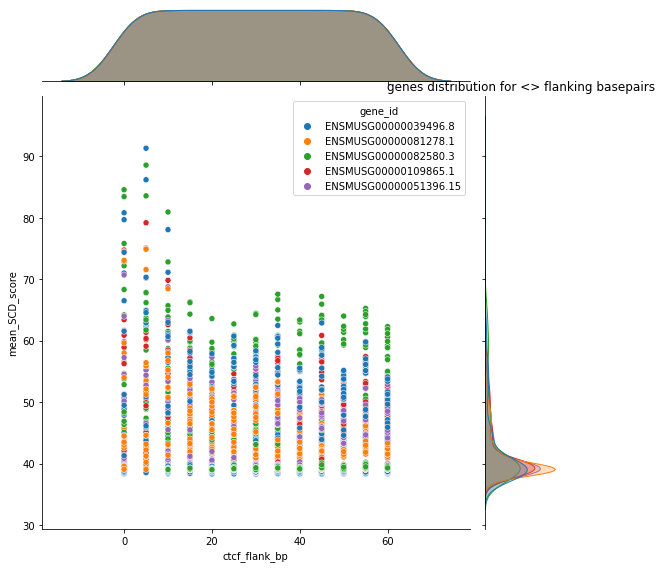

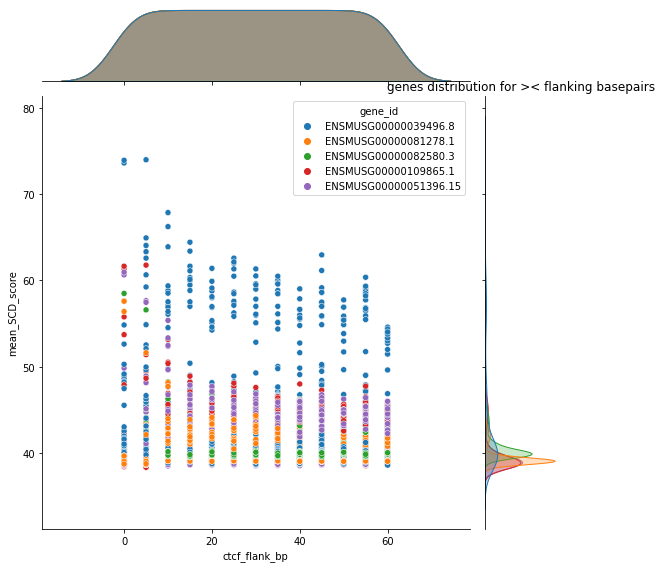

In [10]:
for score in [">>","<<","<>","><"]: #
    data_1 = dfs.loc[dfs["locus_orientation"]==score]
    cutt_off = 0
    sns.jointplot(data=data_1.loc[data_1["mean_SCD_score"]>cutt_off], y=f"mean_SCD_score", x = "ctcf_flank_bp", hue="gene_id",height=8)
    plt.title(f"genes distribution for {score} flanking basepairs")

# Follow up on the possible influencial genes

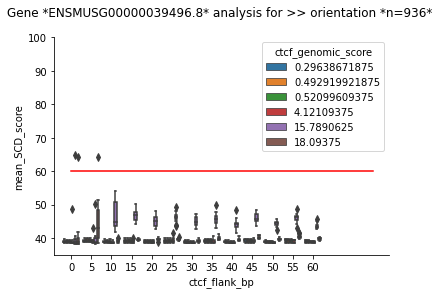

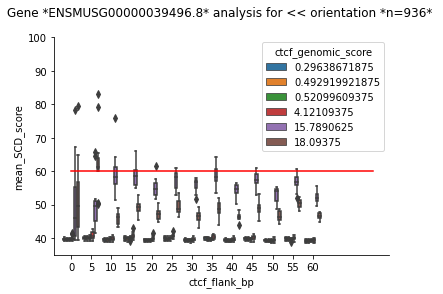

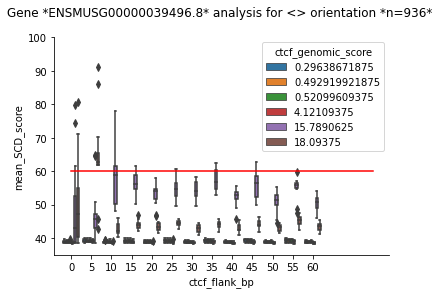

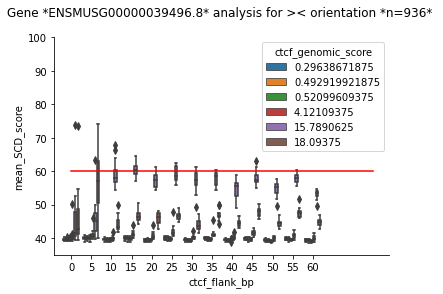

*****************************************
 
 
 
 



ValueError: min() arg is an empty sequence

In [11]:
for special_gene in ["ENSMUSG00000039496.8", "ENSMUSG00000049950.6","ENSMUSG00000075837.1"]: #"ENSMUSG00000094571.1","ENSMUSG00000107222.1","ENSMUSG00000107185.1","ENSMUSG00000106945.1","ENSMUSG00000001376.17","ENSMUSG00000107233.1"]:
    for score in [">>","<<","<>","><"]: 
        data_1 = dfs.loc[dfs["locus_orientation"]==score]
        data_2 = data_1.loc[data_1["gene_id"]==special_gene]
        # data_1 = dfs.loc[dfs["spacer_bp"]==20]
        sns.boxplot(data=data_2, y=f"mean_SCD_score", x = "ctcf_flank_bp", hue="ctcf_genomic_score")
        plt.title(f"Gene *{special_gene}* analysis for {score} orientation *n={data_2.shape[0]}* \n")
        sns.despine(top = True, right = True)
        dt=[i for i in range(0,16,5)]
        plt.plot(dt,[60]*(len(dt)),color='r')
        plt.ylim([35, 100])
        plt.show()
        plt.close()
    print("*****************************************\n \n \n \n \n")

In [ ]:
# df_3d = pd.DataFrame()
# df_3d['x'] = dfs['flank_bp']
# df_3d['y'] = dfs['spacer_bp']
# df_3d['z'] = dfs['locus_orientation']

# sns.pairplot(df_3d)

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter3D(dfs['flank_bp'].values.tolist(),dfs['spacer_bp'].values.tolist(),dfs['locus_orientation'].values.tolist())

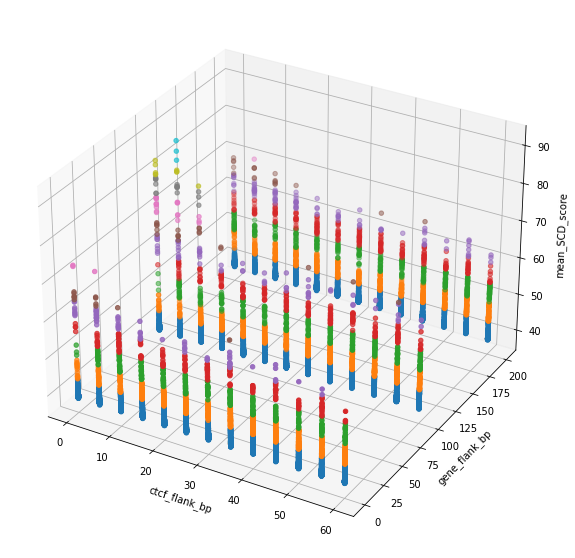

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = dfs["mean_SCD_score"]
xdata = dfs['ctcf_flank_bp']
ydata = dfs['gene_flank_bp']

ax.set_zlabel('mean_SCD_score')
ax.set_xlabel('ctcf_flank_bp')
ax.set_ylabel('gene_flank_bp')
# ax.set_zscale('log')

# get colormap from seaborn
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap =cmap)

In [ ]:
[i for i in range(0,201,100)]

In [ ]:
[i for i in range(0,31,10)]